In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt

sys.path.append('../')
from utils.viz_utils import *

translation = "ICAd15_schfd100"

# ConvTransformer

Model parameters: 296,906,552


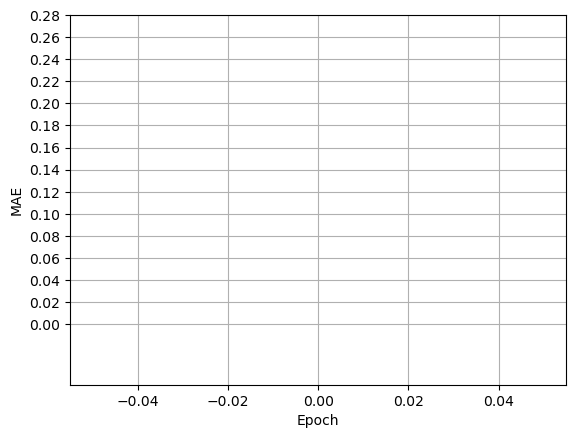

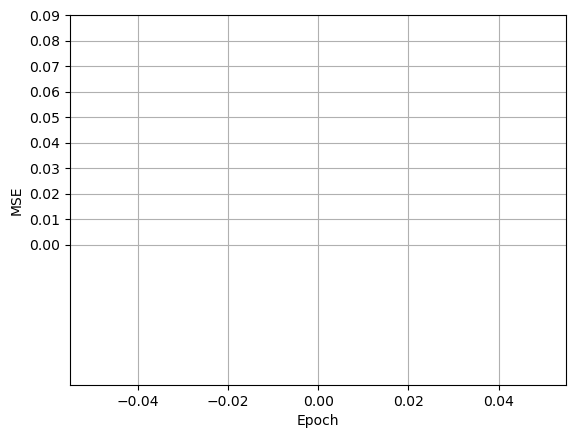

In [2]:
# Training curve
MAEs = []
MSEs = []

print("Model parameters: 296,906,552")
plot_training_losses(MAEs, range=np.arange(0, 0.29, 0.02))
plot_training_losses(MSEs, loss="MSE", range=np.arange(0, 0.1, 0.01))

In [3]:
model_type = "ConvTransformer"

# load_data
test_Target = np.load(f"/Users/fyzeen/FyzeenLocal/GitHub/NeuroTranslate/SurfToNetmat/model_output/{translation}/{model_type}/test_ground_truth.npy")
test_pred = np.load(f"/Users/fyzeen/FyzeenLocal/GitHub/NeuroTranslate/SurfToNetmat/model_output/{translation}/{model_type}/test_pred.npy")

train_Target = np.load(f"/Users/fyzeen/FyzeenLocal/GitHub/NeuroTranslate/SurfToNetmat/model_output/{translation}/{model_type}/train_ground_truth.npy")
train_pred = np.load(f"/Users/fyzeen/FyzeenLocal/GitHub/NeuroTranslate/SurfToNetmat/model_output/{translation}/{model_type}/train_pred.npy")

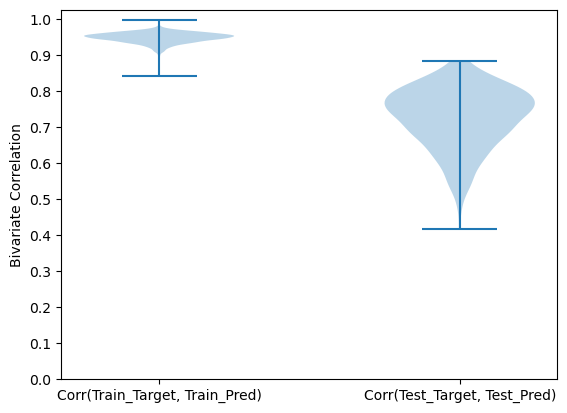

In [4]:
test_corrs = []
for i in range(test_Target.shape[0]):
    corr = np.corrcoef(test_Target[i, :], test_pred[i, :])
    test_corrs.append(corr[0,1])

train_corrs = []
for i in range(train_Target.shape[0]):
    corr = np.corrcoef(train_Target[i, :], train_pred[i, :])
    train_corrs.append(corr[0,1])

plt.violinplot([train_corrs, test_corrs])
plt.xticks([1, 2], ['Corr(Train_Target, Train_Pred)', 'Corr(Test_Target, Test_Pred)'])
plt.yticks(np.arange(0, 1.1, 0.1))
plt.ylabel("Bivariate Correlation")
plt.show()

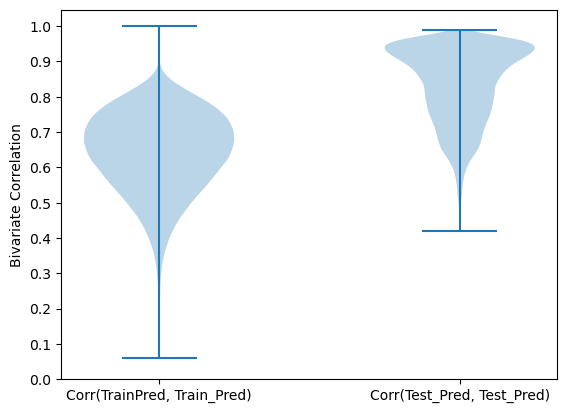

In [5]:
# Corr(train_preds, train_preds)
corr = np.corrcoef(train_pred)
traintrain_pred_corrs = corr[np.triu_indices_from(corr, k=1)]

# Corr(test_preds, test_preds)
corr = np.corrcoef(test_pred)
testtest_pred_corrs = corr[np.triu_indices_from(corr, k=1)]

plt.violinplot([traintrain_pred_corrs, testtest_pred_corrs])
plt.xticks([1, 2], ['Corr(TrainPred, Train_Pred)', 'Corr(Test_Pred, Test_Pred)'])
plt.yticks(np.arange(0, 1.1, 0.1))
plt.ylabel("Bivariate Correlation")
plt.show()

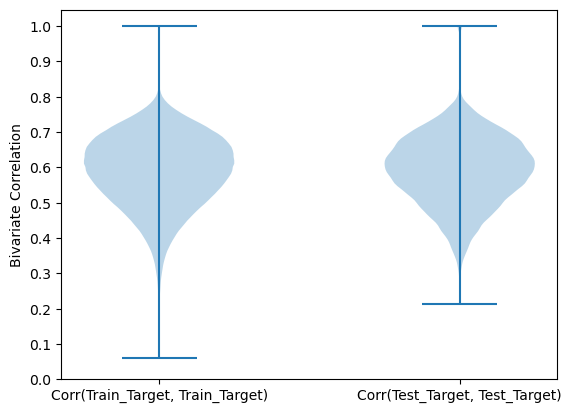

In [6]:
# Corr(train_Target, train_grountruth)
corr = np.corrcoef(train_Target)
traintrain_Target_corrs = corr[np.triu_indices_from(corr, k=1)]

# Corr(test_Target, test_Target)
corr = np.corrcoef(test_Target)
testtest_Target_corrs = corr[np.triu_indices_from(corr, k=1)]

plt.violinplot([traintrain_Target_corrs, testtest_Target_corrs])
plt.xticks([1, 2], ['Corr(Train_Target, Train_Target)', 'Corr(Test_Target, Test_Target)'])
plt.yticks(np.arange(0, 1.1, 0.1))
plt.ylabel("Bivariate Correlation")
plt.show()

In [18]:
def show_subj_hemi(ground_truth_mat, pred_mat, subj_idx):
    mean_train = np.mean(ground_truth_mat, axis=0)
    ground_truth = ground_truth_mat[subj_idx, :]
    pred = pred_mat[subj_idx, :]
    print(f"Correlation: {np.corrcoef(ground_truth, pred)[0,1]}")
    print(f"De-meaned correlation: {np.corrcoef(ground_truth-mean_train, pred-mean_train)[0,1]}")
    show_netmats(ground_truth, pred)

Correlation: 0.7451562197782472
De-meaned correlation: 0.2115493130054333


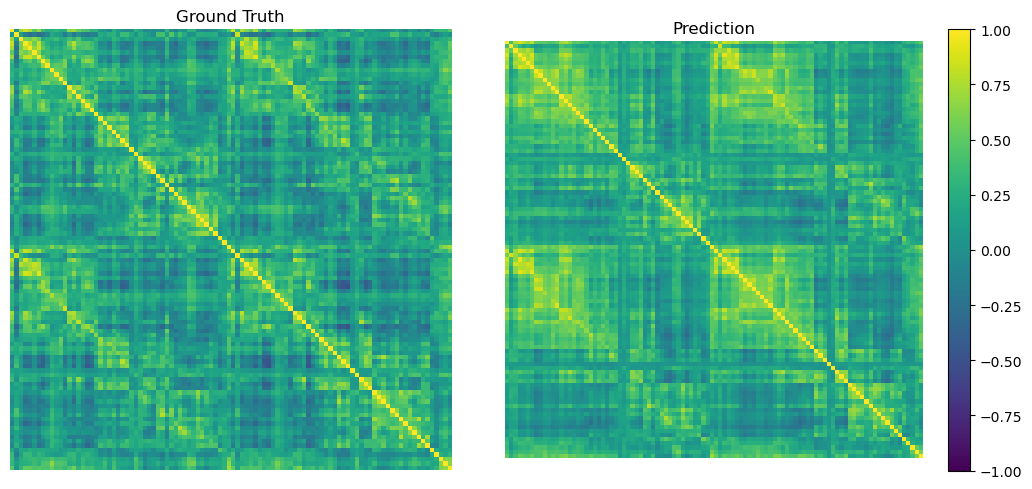

In [29]:
# TEST
show_subj_hemi(test_Target, test_pred, 200)

Correlation: 0.9499232863744121
De-meaned correlation: 0.9168976051318248


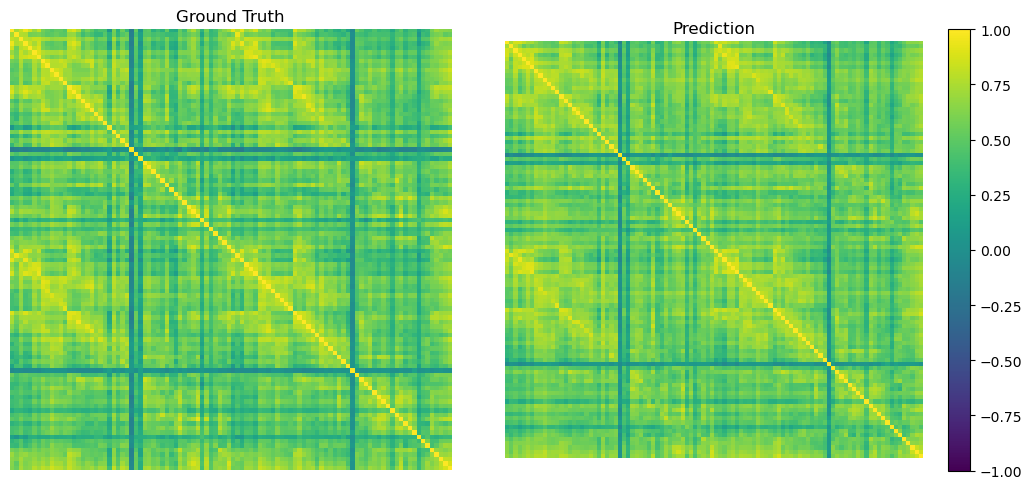

In [30]:
# TRAIN
show_subj_hemi(train_Target, train_pred, 3)


# Graph Transformer -- Brain Transformer

Number parameters: 341,948,472


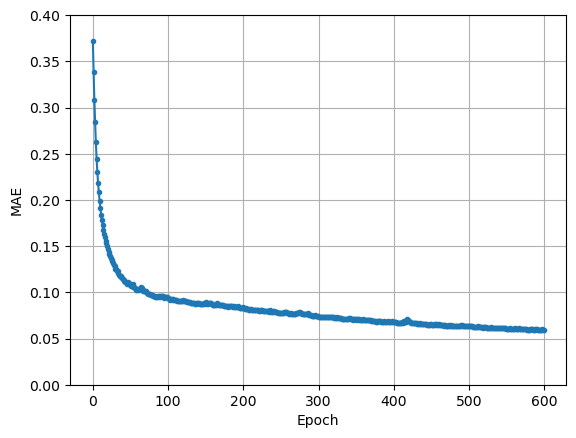

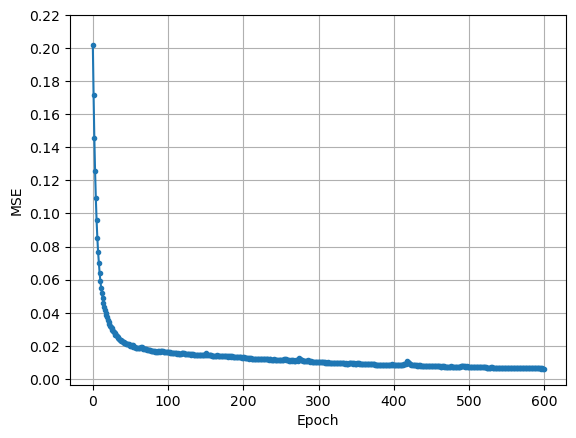

In [5]:
MAEs = []
MSEs = []

print("Number parameters: 341,948,472")
plot_training_losses(MAEs, range=np.arange(0, 0.41, 0.05))
plot_training_losses(MSEs, loss="MSE", range=np.arange(0, 0.23, 0.02))

In [10]:
model_type = "GraphTransformer"

# load_data
test_Target = np.load(f"/Users/fyzeen/FyzeenLocal/GitHub/NeuroTranslate/SurfToNetmat/model_output/{translation}/{model_type}/test_ground_truth.npy")
test_pred = np.load(f"/Users/fyzeen/FyzeenLocal/GitHub/NeuroTranslate/SurfToNetmat/model_output/{translation}/{model_type}/test_pred.npy")

train_Target = np.load(f"/Users/fyzeen/FyzeenLocal/GitHub/NeuroTranslate/SurfToNetmat/model_output/{translation}/{model_type}/train_ground_truth.npy")
train_pred = np.load(f"/Users/fyzeen/FyzeenLocal/GitHub/NeuroTranslate/SurfToNetmat/model_output/{translation}/{model_type}/train_pred.npy")

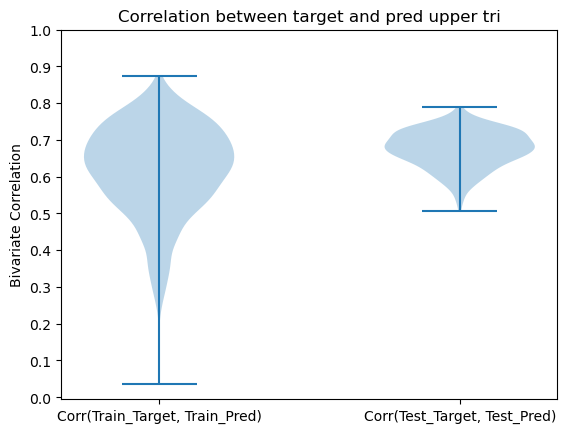

In [11]:
test_corrs = []
for i in range(test_Target.shape[0]):
    corr = np.corrcoef(test_Target[i, :, :][np.triu_indices_from(test_Target[i, :, :], k=-1)], test_pred[i, :, :][np.triu_indices_from(test_pred[i, :, :], k=-1)])
    test_corrs.append(corr[0,1])

train_corrs = []
for i in range(train_Target.shape[0]):
    corr = np.corrcoef(train_Target[i, :, :][np.triu_indices_from(train_Target[i, :, :], k=-1)], train_pred[i, :, :][np.triu_indices_from(train_pred[i, :, :], k=-1)])
    train_corrs.append(corr[0,1])

# UPPER TRIANGLE
plt.violinplot([train_corrs, test_corrs])
plt.xticks([1, 2], ['Corr(Train_Target, Train_Pred)', 'Corr(Test_Target, Test_Pred)'])
plt.yticks(np.arange(0, 1.1, 0.1))
plt.ylabel("Bivariate Correlation")
plt.title("Correlation between target and pred upper tri")
plt.show()

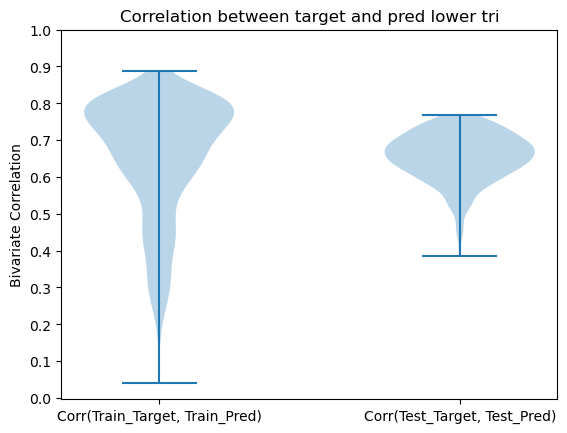

In [12]:
test_corrs = []
for i in range(test_Target.shape[0]):
    corr = np.corrcoef(test_Target[i, :, :][np.tril_indices_from(test_Target[i, :, :], k=-1)], test_pred[i, :, :][np.tril_indices_from(test_pred[i, :, :], k=-1)])
    test_corrs.append(corr[0,1])

train_corrs = []
for i in range(train_Target.shape[0]):
    corr = np.corrcoef(train_Target[i, :, :][np.tril_indices_from(train_Target[i, :, :], k=-1)], train_pred[i, :, :][np.tril_indices_from(train_pred[i, :, :], k=-1)])
    train_corrs.append(corr[0,1])

# LOWERE TRIANGLE
plt.violinplot([train_corrs, test_corrs])
plt.xticks([1, 2], ['Corr(Train_Target, Train_Pred)', 'Corr(Test_Target, Test_Pred)'])
plt.yticks(np.arange(0, 1.1, 0.1))
plt.ylabel("Bivariate Correlation")
plt.title("Correlation between target and pred lower tri")
plt.show()

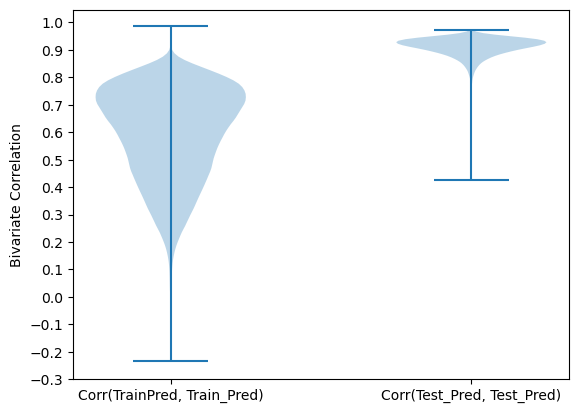

In [13]:
# Corr(train_preds, train_preds)
corr = np.corrcoef(get_lower_tris(train_pred))
traintrain_pred_corrs = corr[np.triu_indices_from(corr, k=1)]

# Corr(test_preds, test_preds)
corr = np.corrcoef(get_lower_tris(test_pred))
testtest_pred_corrs = corr[np.triu_indices_from(corr, k=1)]

plt.violinplot([traintrain_pred_corrs, testtest_pred_corrs])
plt.xticks([1, 2], ['Corr(TrainPred, Train_Pred)', 'Corr(Test_Pred, Test_Pred)'])
plt.yticks(np.arange(-0.3, 1.1, 0.1))
plt.ylabel("Bivariate Correlation")
plt.show()

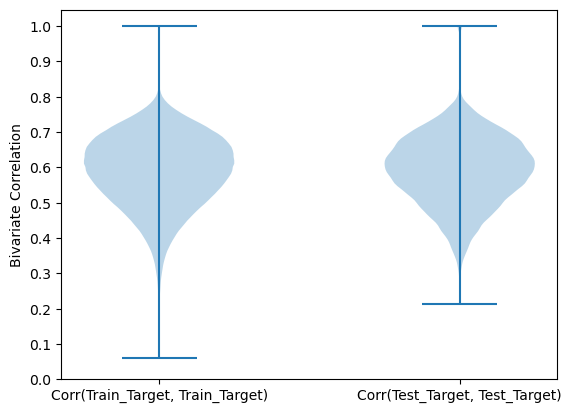

In [256]:
# Corr(train_Target, train_grountruth)
corr = np.corrcoef(get_lower_tris(train_Target))
traintrain_Target_corrs = corr[np.triu_indices_from(corr, k=1)]

# Corr(test_Target, test_Target)
corr = np.corrcoef(get_lower_tris(test_Target))
testtest_Target_corrs = corr[np.triu_indices_from(corr, k=1)]

plt.violinplot([traintrain_Target_corrs, testtest_Target_corrs])
plt.xticks([1, 2], ['Corr(Train_Target, Train_Target)', 'Corr(Test_Target, Test_Target)'])
plt.yticks(np.arange(0, 1.1, 0.1))
plt.ylabel("Bivariate Correlation")
plt.show()

Upper triangle correlation: 0.5924281483560241
Lower triangle correlation: 0.6706163460498844


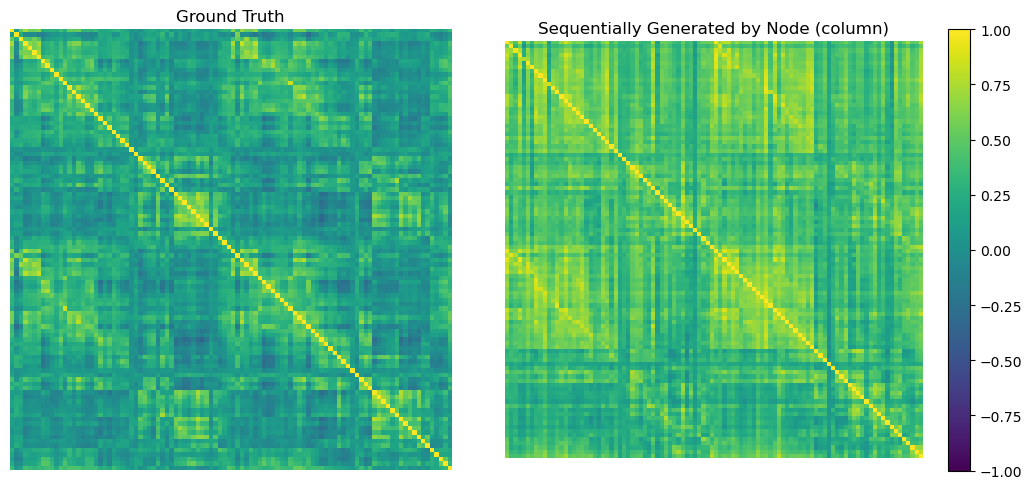

In [259]:
# TEST
show_subj_hemi_made(test_Target, test_pred, 0)

Upper triangle correlation: 0.498193364319562
Lower triangle correlation: 0.7564680578903515


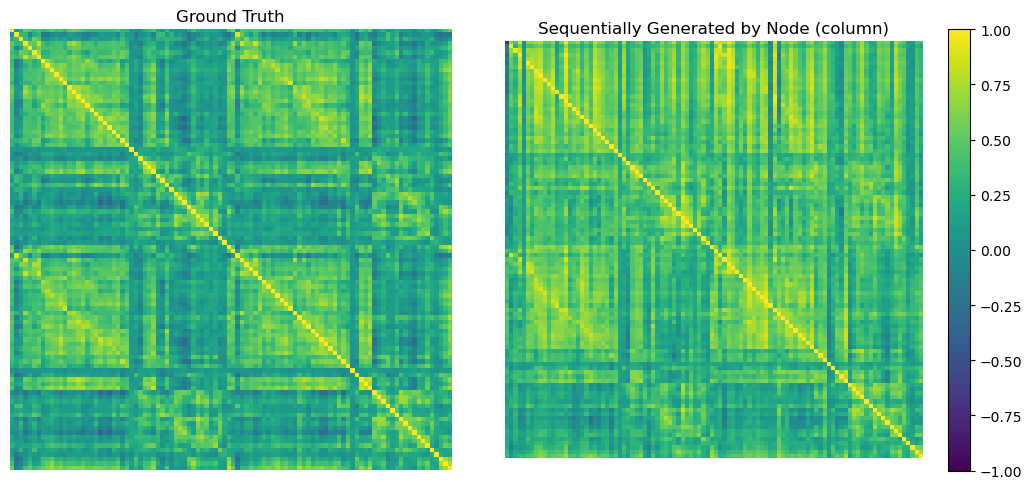

In [260]:
# TRAIN
show_subj_hemi_made(train_Target, train_pred, 0)

# TriuGraphTransformer

Number parameters: 392,381,610


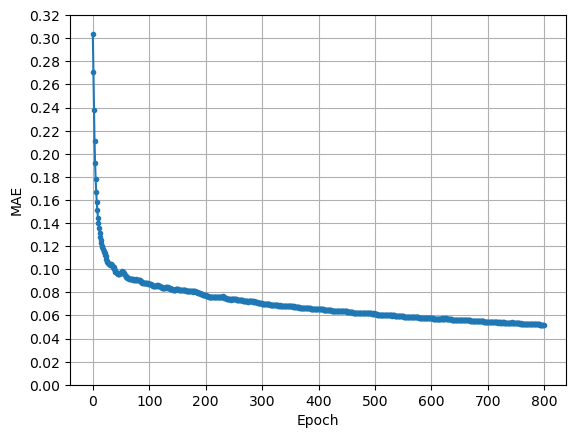

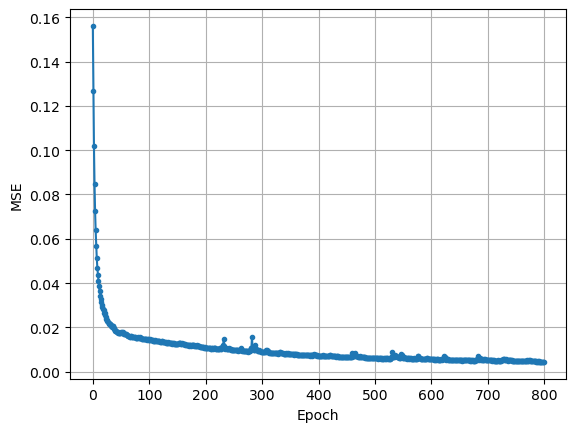

In [14]:
MAEs = []
MSEs = []

print("Number parameters: 392,381,610")
plot_training_losses(MAEs, range=np.arange(0, 0.33, 0.02))
plot_training_losses(MSEs, loss="MSE", range=np.arange(0, 0.17, 0.02))

In [15]:
model_type = "TriuGraphTransformer"

# load_data
test_Target = np.load(f"/Users/fyzeen/FyzeenLocal/GitHub/NeuroTranslate/SurfToNetmat/model_output/{translation}/{model_type}/test_ground_truth.npy")
test_pred = np.load(f"/Users/fyzeen/FyzeenLocal/GitHub/NeuroTranslate/SurfToNetmat/model_output/{translation}/{model_type}/test_pred.npy")

train_Target = np.load(f"/Users/fyzeen/FyzeenLocal/GitHub/NeuroTranslate/SurfToNetmat/model_output/{translation}/{model_type}/train_ground_truth.npy")
train_pred = np.load(f"/Users/fyzeen/FyzeenLocal/GitHub/NeuroTranslate/SurfToNetmat/model_output/{translation}/{model_type}/train_pred.npy")

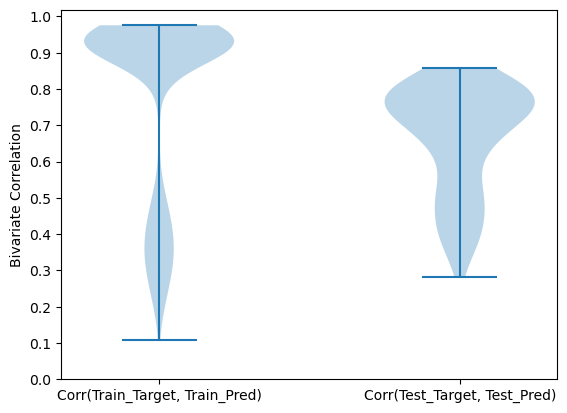

In [16]:
test_corrs = []
for i in range(test_Target.shape[0]):
    corr = np.corrcoef(test_Target[i, :], test_pred[i, :])
    test_corrs.append(corr[0,1])

train_corrs = []
for i in range(train_Target.shape[0]):
    corr = np.corrcoef(train_Target[i, :], train_pred[i, :])
    train_corrs.append(corr[0,1])

plt.violinplot([train_corrs, test_corrs])
plt.xticks([1, 2], ['Corr(Train_Target, Train_Pred)', 'Corr(Test_Target, Test_Pred)'])
plt.yticks(np.arange(0, 1.1, 0.1))
plt.ylabel("Bivariate Correlation")
plt.show()

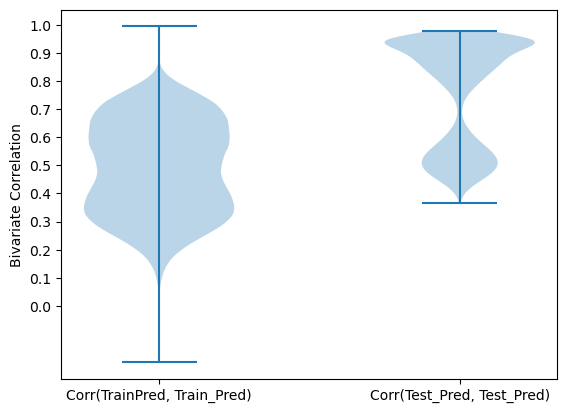

In [17]:
# Corr(train_preds, train_preds)
corr = np.corrcoef(train_pred)
traintrain_pred_corrs = corr[np.triu_indices_from(corr, k=1)]

# Corr(test_preds, test_preds)
corr = np.corrcoef(test_pred)
testtest_pred_corrs = corr[np.triu_indices_from(corr, k=1)]

plt.violinplot([traintrain_pred_corrs, testtest_pred_corrs])
plt.xticks([1, 2], ['Corr(TrainPred, Train_Pred)', 'Corr(Test_Pred, Test_Pred)'])
plt.yticks(np.arange(0, 1.1, 0.1))
plt.ylabel("Bivariate Correlation")
plt.show()

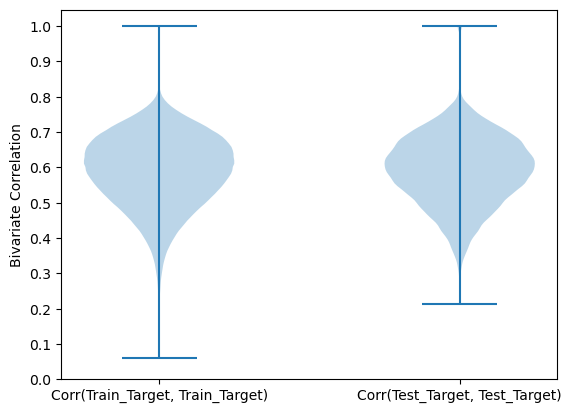

In [494]:
# Corr(train_Target, train_grountruth)
corr = np.corrcoef(train_Target)
traintrain_Target_corrs = corr[np.triu_indices_from(corr, k=1)]

# Corr(test_Target, test_Target)
corr = np.corrcoef(test_Target)
testtest_Target_corrs = corr[np.triu_indices_from(corr, k=1)]

plt.violinplot([traintrain_Target_corrs, testtest_Target_corrs])
plt.xticks([1, 2], ['Corr(Train_Target, Train_Target)', 'Corr(Test_Target, Test_Target)'])
plt.yticks(np.arange(0, 1.1, 0.1))
plt.ylabel("Bivariate Correlation")
plt.show()

Correlation: 0.9159404491180506


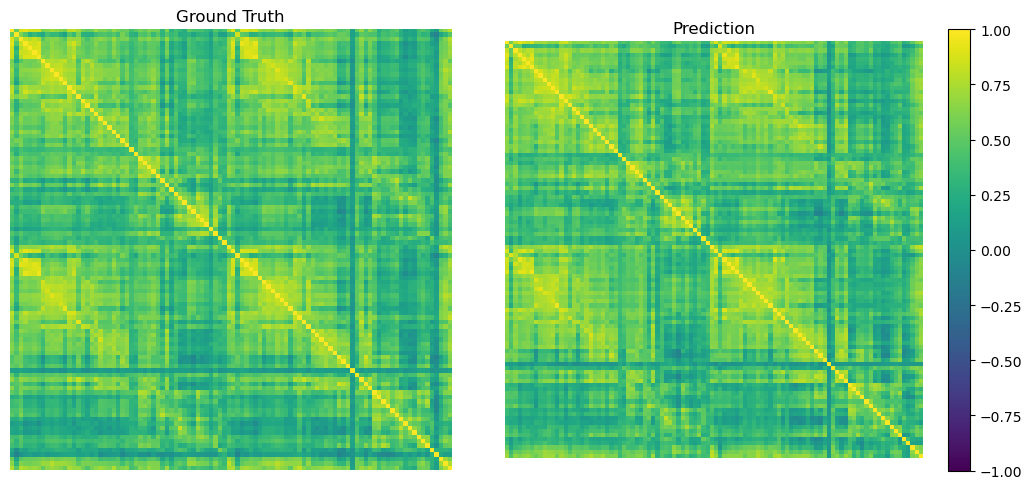

In [500]:
# TEST
show_subj_hemi(train_Target, train_pred, 100)

Correlation: 0.28656977548715884


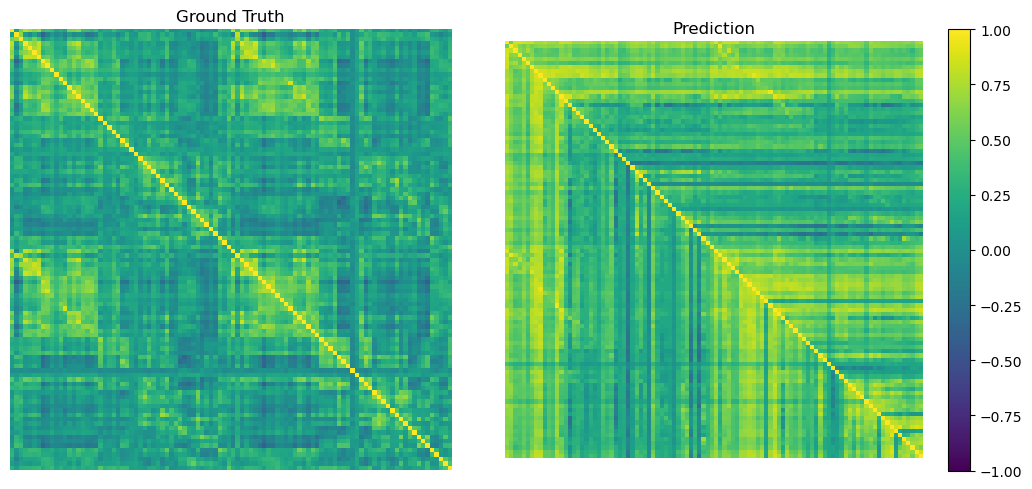

In [497]:
# TRAIN
show_subj_hemi(train_Target, train_pred, 200)

Correlation: 0.74399667433793


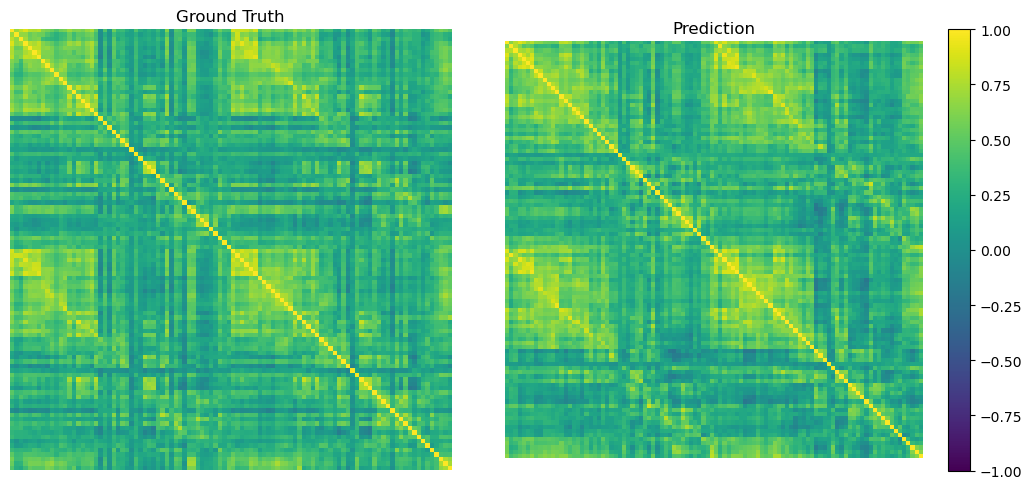

In [28]:
show_subj_hemi(test_Target, test_pred, 101)